In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
weight_data = pd.read_csv("weight-height.csv")

In [3]:
weight_data.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
weight_data.tail(5)

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [5]:
weight_data.info()
#It basically shows the number of entries, the column names and the column types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
weight_data.describe()
#The describe method displays basic statistical information on the numerical values of the dataset like mean, standard deviation, percentile, min and max.

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [7]:
weight_data.isnull().sum()
## no missing value are their in the data set.

Gender    0
Height    0
Weight    0
dtype: int64

In [36]:
# converting categorical feature to numerical
#In our dataset, we can see that we have one field — “Gender” which is categorical. So we have to convert this field into numerical.
# it can be done in two ways (a)mapping,(b)label encoding (useful when categorical value has more than 2 values)
weight_data["Gender"] = weight_data["Gender"].map({'Male':0,'Female':1})

weight_data.tail(10)

,Gender,Height,Weight
9990,NaN,63.179498,141.266100
9991,NaN,62.636675,102.853563
9992,NaN,62.077832,138.691680
9993,NaN,60.030434,97.687432
9994,NaN,59.098250,110.529686
9995,NaN,66.172652,136.777454
9996,NaN,67.067155,170.867906
9997,NaN,63.867992,128.475319
9998,NaN,69.034243,163.852461
9999,NaN,61.944246,113.649103


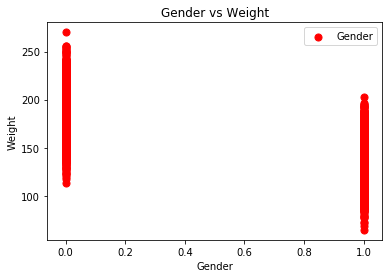

In [9]:
#let's check corelation between different columns
x1= weight_data.iloc[:,0].values
y1= weight_data.iloc[:,2].values
plt.scatter(x1,y1,label='Gender',color='red',s=50)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Gender vs Weight')
plt.legend()
plt.show()

In [ ]:
## it is clear from the above graph is that male are having higher weight than female. But one cannot predict weight from gender

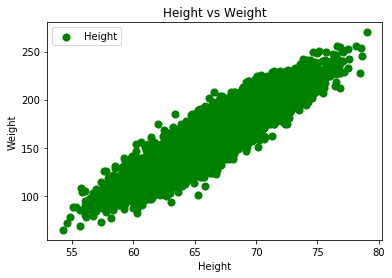

In [13]:
x2= weight_data.iloc[:,1].values
y2= weight_data.iloc[:,2].values
plt.scatter(x2,y2,label='Height',color='green',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend()
plt.show()

In [14]:
## from the above graph there is a linear relation between height and weight.
## with increase of height ,weight also varies linearly.

In [24]:
## it is clear that height is the independent variable , weight is the dependent variable
#separating the dependent and independent values....
#X-Independent variable
X = weight_data.iloc[:, :-1].values
print(X)
#Y-Dependent variable
Y =weight_data.iloc[:,2].values
print(Y)

[[ 0.         73.84701702]
 [ 0.         68.78190405]
 [ 0.         74.11010539]
 ...
 [ 1.         63.86799221]
 [ 1.         69.03424313]
 [ 1.         61.94424588]]
[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


In [25]:
## train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [26]:
## building model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train) # model fits the training data set
#predicting the test set
y_pred = lm.predict(X_test) # model predicts on test data

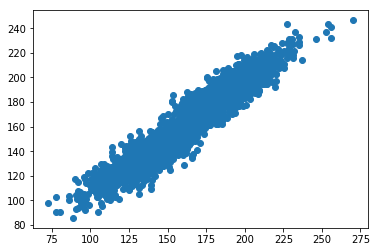

In [27]:
plt.scatter(Y_test ,y_pred)

In [28]:
## checking accuracy
from sklearn import metrics
metrics.mean_absolute_error(Y_test,y_pred)

7.896343561153815

In [29]:
##MSE
metrics.mean_squared_error(Y_test,y_pred)

96.43167402935865

In [30]:
#### RMSE
np.sqrt(metrics.mean_squared_error(Y_test,y_pred))

9.819963036048488

In [31]:
#Based off of MAE, MSE and RMSE, we can improve our model by minizing the values of these 3 parameters.
#### calculate variance. Closer the value is to 1 ,  higher is the model accuracy
lm.score(X_test,Y_test)

0.9090412835183056

In [37]:
#predict my weight
my_weight_predict = lm.predict([[0,65]])
print('My predicted weight = ',my_weight_predict)

My predicted weight =  [162.92476546]
